In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [7]:
print(os.getcwd())
aisles_df = pd.read_csv(r'DATA\aisles.csv')
dept_df = pd.read_csv(r'DATA\departments.csv')
order_prior = pd.read_csv(r'DATA\order_products__prior.csv')
order_train = pd.read_csv(r'DATA\order_products__train.csv')
order_df = pd.read_csv(r'DATA\orders.csv')
prod_df = pd.read_csv(r'DATA\products.csv')

d:\AAIC\Project 5


##### Understanding the 'AISLES' dataset:

In [17]:
print('HEAD: \n', aisles_df.head(20))
print('SHAPE: \n', aisles_df.shape)

HEAD: 
     aisle_id                         aisle
0          1         prepared soups salads
1          2             specialty cheeses
2          3           energy granola bars
3          4                 instant foods
4          5    marinades meat preparation
5          6                         other
6          7                 packaged meat
7          8               bakery desserts
8          9                   pasta sauce
9         10              kitchen supplies
10        11              cold flu allergy
11        12                   fresh pasta
12        13                prepared meals
13        14        tofu meat alternatives
14        15              packaged seafood
15        16                   fresh herbs
16        17            baking ingredients
17        18  bulk dried fruits vegetables
18        19                 oils vinegars
19        20                  oral hygiene
SHAPE: 
 (134, 2)


##### Understanding the 'DEPARTMENT' dataset:

In [19]:
print('HEAD: \n', dept_df.head(21))
print('SHAPE: ', dept_df.shape)

HEAD: 
     department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing
SHAPE:  (21, 2)


##### Understanding the 'PRODUCTS' dataset:

In [85]:
print('SHAPE: ', prod_df.shape)
print('HEAD: \n')
prod_df.head()

SHAPE:  (49688, 4)
HEAD: 



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [25]:
print('How many unique aisles: ', prod_df['aisle_id'].nunique())
print('How many unique departments: ', prod_df['department_id'].nunique())

How many unique aisles:  134
How many unique departments:  21


   aisle_id  Product_Count
0         1            146
1         2            271
2         3            832
3         4            543
4         5            409


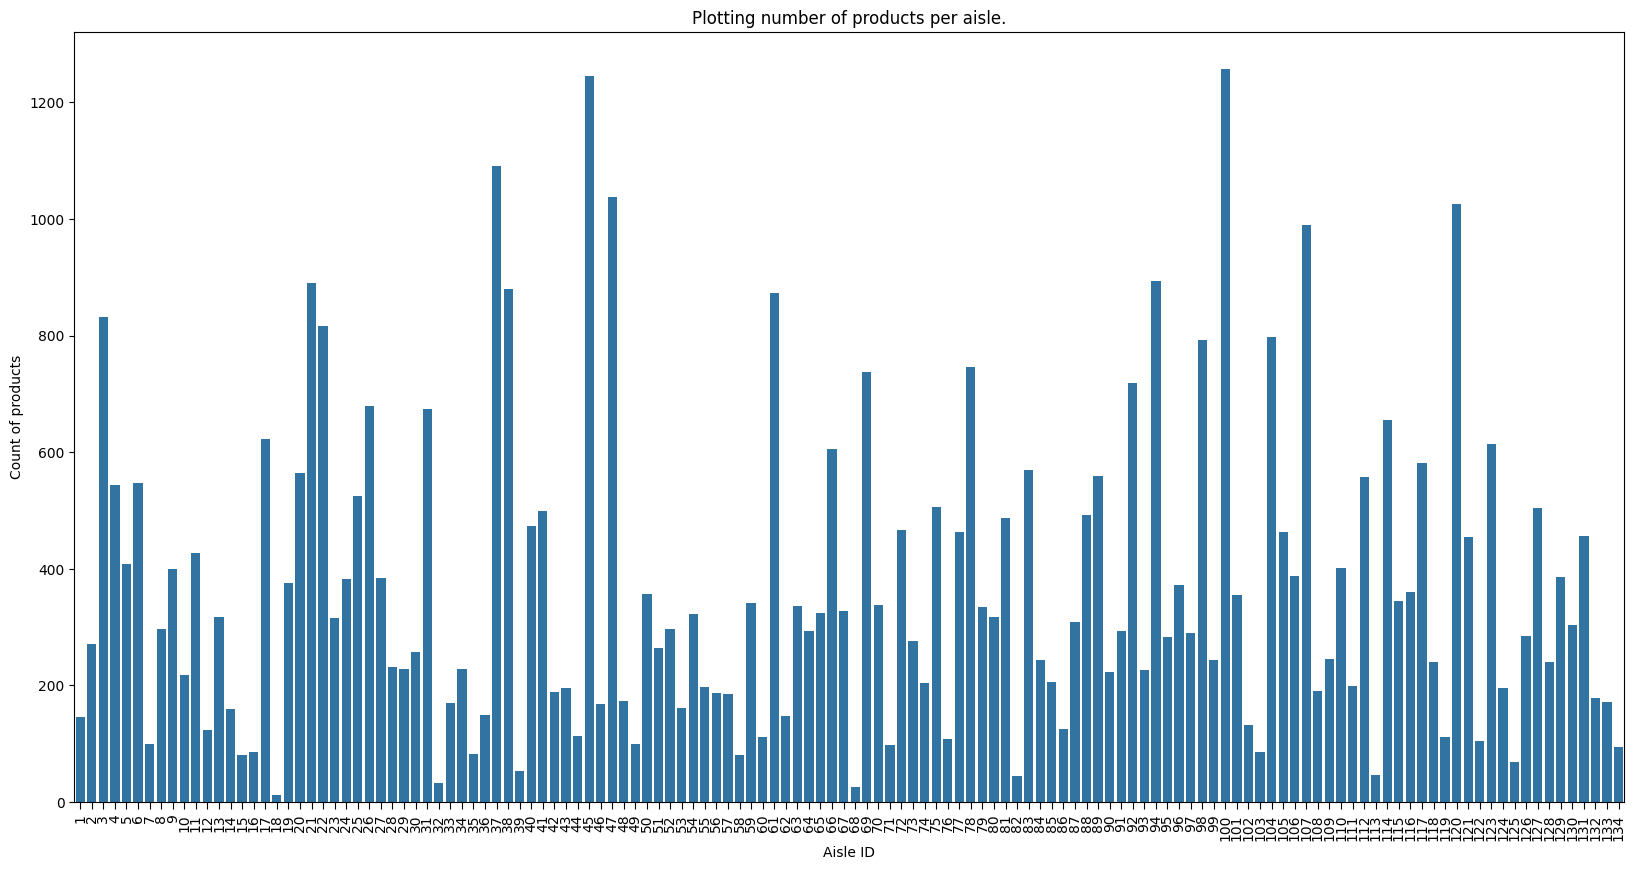

In [58]:
df = prod_df.groupby('aisle_id')['product_id'].count().reset_index()
df.rename(columns = {'product_id':'Product_Count'},inplace=True)
print(df.head())

fig = plt.figure(figsize = (20,10))
ax = sns.barplot(x='aisle_id',y='Product_Count',data=df)
ax.xaxis.set_tick_params(rotation=90,size=5)
plt.xlabel('Aisle ID')
plt.ylabel('Count of products')
plt.title('Plotting number of products per aisle.')
plt.show()
fig.savefig('FIGURES\prodVsAisle.png')


There are some aisles that have very less product count. Similary some aisles have large product count. What are those aisles and their departments? 
What is the min, median and max product count? Get their aisle and dept info

In [83]:
print('Minimum product count is {0} and the aisle id is {1}'.format(df['Product_Count'].min(),df['aisle_id'][df['Product_Count']== df['Product_Count'].min()].values[0]))
print('Maximum product count is {0} and the aisle id is {1}'.format(df['Product_Count'].max(),df['aisle_id'][df['Product_Count']== df['Product_Count'].max()].values[0]))
print('Median number of products across all aisles: ',df["Product_Count"].median())

Minimum product count is 12 and the aisle id is 18
Maximum product count is 1258 and the aisle id is 100
Median number of products across all aisles:  305.5


   department_id  Product_Count
0              1           4007
1              2            548
2              3           1516
3              4           1684
4              5           1054


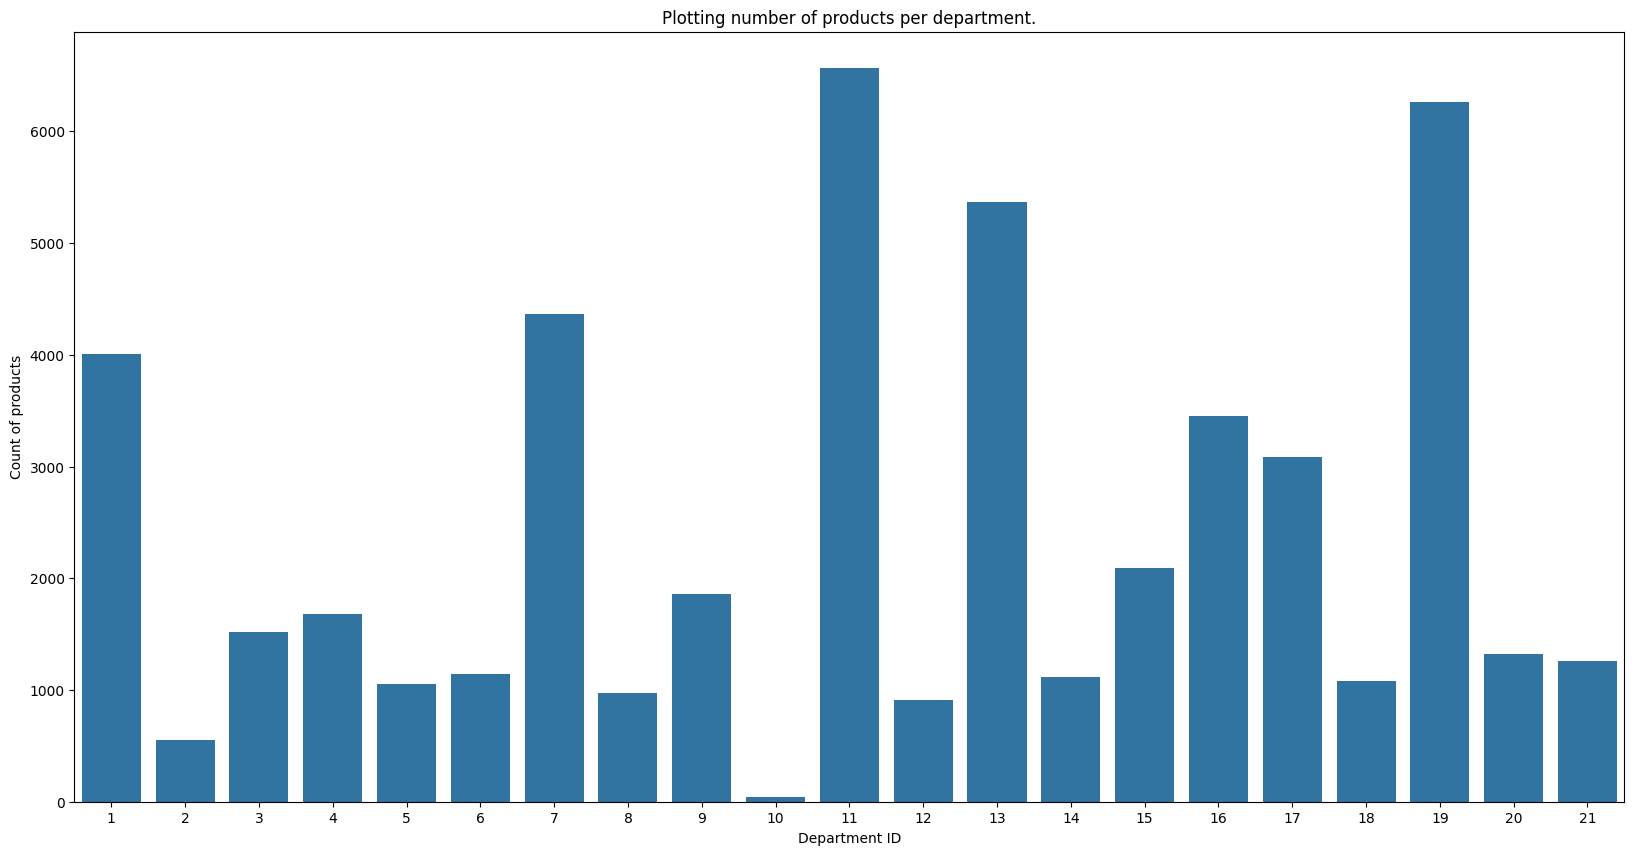

In [91]:
d_df = prod_df.groupby('department_id')['product_id'].count().reset_index()
d_df.rename(columns = {'product_id':'Product_Count'},inplace=True)
print(d_df.head())

fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x='department_id',y='Product_Count', data=d_df)
plt.xlabel('Department ID')
plt.ylabel('Count of products')
plt.title('Plotting number of products per department.')
plt.show()
fig.savefig('FIGURES\prodVsDept.png')

In [94]:
print('Minimum product count is {0} and the department id is {1}.'.format(d_df['Product_Count'].min(), d_df['department_id'][d_df['Product_Count'] == d_df['Product_Count'].min()].values[0]))
print('Maximum product count is {0} and the department id is {1}.'.format(d_df['Product_Count'].max(), d_df['department_id'][d_df['Product_Count'] == d_df['Product_Count'].max()].values[0]))
print('Median product count across all departments is {0}.'.format(d_df['Product_Count'].median()))

Minimum product count is 38 and the department id is 10.
Maximum product count is 6563 and the department id is 11.
Median product count across all departments is 1516.0.


   department_id  Aisle_Count
0              1           11
1              2            1
2              3            5
3              4            5
4              5            5


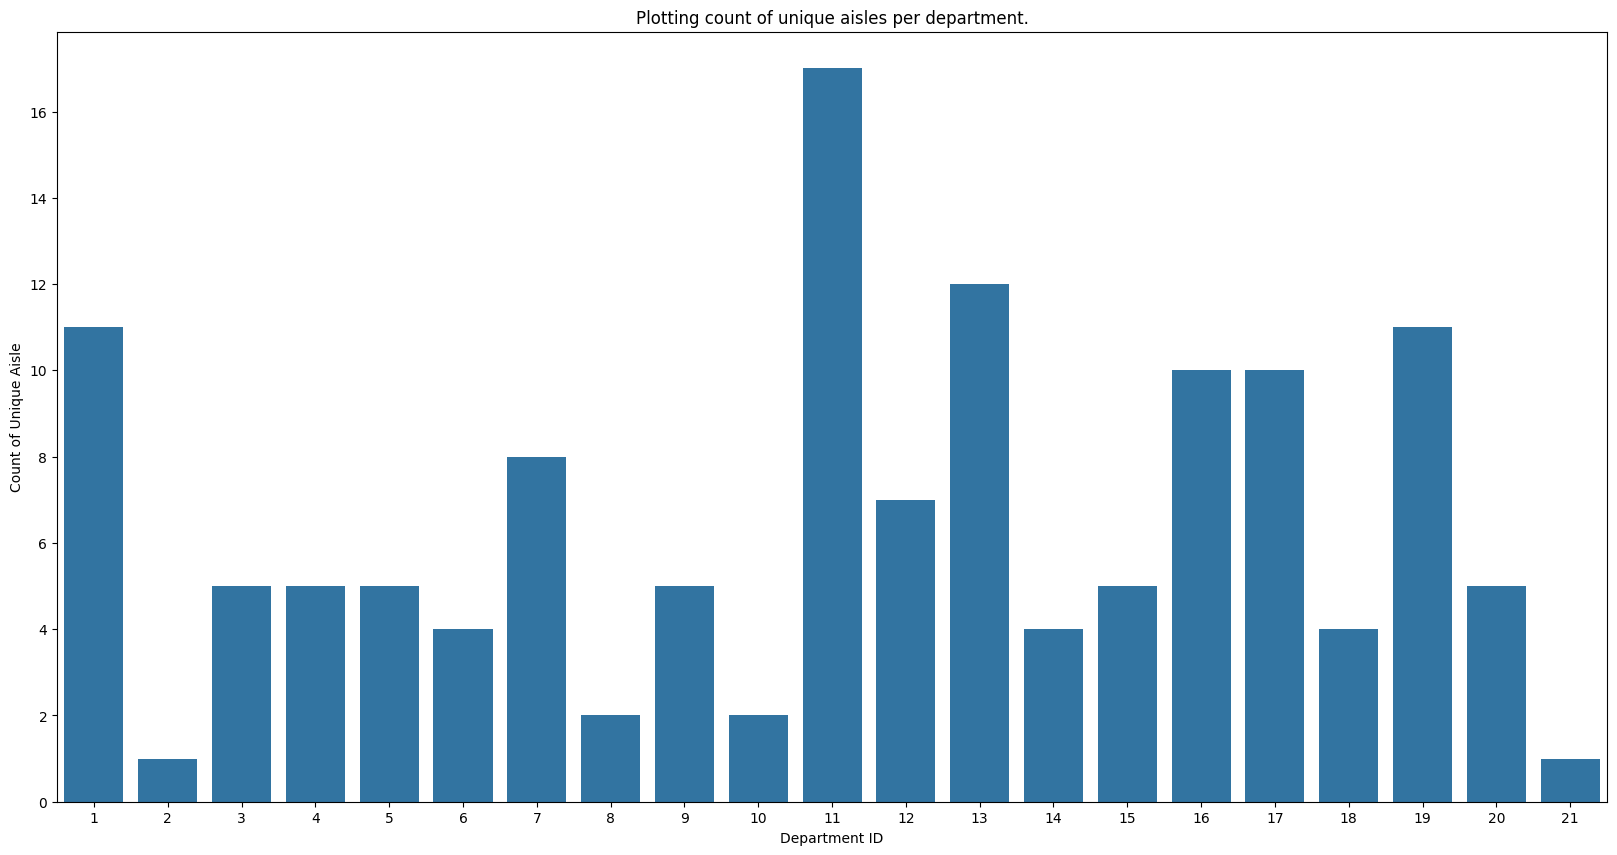

In [101]:
da_df = prod_df.groupby('department_id')['aisle_id'].nunique().reset_index()
da_df.rename(columns={'aisle_id':'Aisle_Count'},inplace=True)
print(da_df.head())

fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x='department_id', y='Aisle_Count', data = da_df)
plt.xlabel('Department ID')
plt.ylabel('Count of Unique Aisle')
plt.title('Plotting count of unique aisles per department.')
fig.savefig('FIGURES\DeptVsAisle.png')

In [102]:
print('Minimum unique aisle count is {0} for  the department id is {1}.'.format(da_df['Aisle_Count'].min(), da_df['department_id'][da_df['Aisle_Count'] == da_df['Aisle_Count'].min()].values[0]))
print('Maximum unique aisle count is {0} for the department id is {1}.'.format(da_df['Aisle_Count'].max(), da_df['department_id'][da_df['Aisle_Count'] == da_df['Aisle_Count'].max()].values[0]))
print('Median unique aisle count across all departments is {0}.'.format(da_df['Aisle_Count'].median()))

Minimum unique aisle count is 1 for  the department id is 2.
Maximum unique aisle count is 17 for the department id is 11.
Median unique aisle count across all departments is 5.0.


1. Department 11 has the maximum product count as well as maximum unique aisle. This shows that department 11 is containing a large number of varied products. We can expect to see that many transactions are recorded having products belonging to department 11. We donot have enough understanding (yet) to state whether department 11 also has a high order or re-order rate.


2. Department 10 has products covering two unique aisles only. This means only two types of product are covering this department. Also, it records having minimum product count of 38. This shows that department 2 houses a small count of products of only 2 type. We need to check if this department also records low order or re-order rate, which will confirm the assumption that department 2 is a less important one.


3. The median spread of a department is covering approx 5 unique aisles. The aisles, in turn, contain an approx 306 products. This is in line with the insights that we have gathered from EDA (till now) that each department contains approximately 1516 products.

##### Lets combine Products, Department and Aisles dataset: